In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [17]:
df = pd.read_csv('datasets/diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 767 entries, 0 to 766
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               767 non-null    int64  
 1   Glucose                   767 non-null    int64  
 2   BloodPressure             767 non-null    int64  
 3   SkinThickness             767 non-null    int64  
 4   Insulin                   767 non-null    int64  
 5   BMI                       767 non-null    float64
 6   DiabetesPedigreeFunction  767 non-null    float64
 7   Age                       767 non-null    int64  
 8   Outcome                   767 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [19]:
# Boş veri kontrolü:
for i in range(len(df.columns)):
    bosVeri = df[df.columns[i]].isnull().sum()
    print(f'"{df.columns[i]}" sutundaki bos veri sayisi: {bosVeri}')


"Pregnancies" sutundaki bos veri sayisi: 0
"Glucose" sutundaki bos veri sayisi: 0
"BloodPressure" sutundaki bos veri sayisi: 0
"SkinThickness" sutundaki bos veri sayisi: 0
"Insulin" sutundaki bos veri sayisi: 0
"BMI" sutundaki bos veri sayisi: 0
"DiabetesPedigreeFunction" sutundaki bos veri sayisi: 0
"Age" sutundaki bos veri sayisi: 0
"Outcome" sutundaki bos veri sayisi: 0


In [20]:
# Object Veri Tespiti:
objectVeriListesi =[]
for j in range(len(df.columns)):
    if df[df.columns[j]].dtype == 'o':
        objectVeriListesi.append(df[df.columns[j]].name)
objectVeriListesi

[]

In [21]:
# Sütun verilerini detaylı olarak görüntüleme:
for k in range(len(df.columns)):
    icerikBilgisi = df[df.columns[k]].value_counts()
    print(icerikBilgisi)
    print('\n\n')

Pregnancies
1     134
0     111
2     103
3      75
4      68
5      57
6      50
7      45
8      38
9      28
10     24
11     11
13     10
12      9
14      2
15      1
17      1
Name: count, dtype: int64



Glucose
99     17
100    17
111    14
129    14
125    14
       ..
191     1
177     1
44      1
62      1
190     1
Name: count, Length: 136, dtype: int64



BloodPressure
70     56
74     52
78     45
68     45
72     44
64     43
80     40
76     39
60     37
0      35
62     34
66     30
82     30
88     25
84     23
90     22
86     21
58     21
50     13
56     12
52     11
54     11
75      8
92      8
65      7
85      6
94      6
48      5
96      4
44      4
100     3
106     3
98      3
110     3
55      2
108     2
104     2
46      2
30      2
122     1
95      1
102     1
61      1
24      1
38      1
40      1
114     1
Name: count, dtype: int64



SkinThickness
0     227
32     31
30     27
27     23
23     22
33     20
28     20
18     20
19     18
39     18
31

In [22]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [23]:
y = df['Outcome']
x = df.drop(['Outcome'], axis=1)

In [24]:
knn = KNeighborsClassifier()
model = knn.fit(x, y)

In [25]:
model.score(x, y)

0.803129074315515

In [39]:
# Skorları listeye ekleme:
skorListesi = []
for l in range(1, len(x)+1):
    knn2 = KNeighborsClassifier(n_neighbors=l)
    model2 = knn2.fit(x, y)
    skor = model2.score(x, y)
    skorListesi.append(skor)
skorListesi

[1.0,
 0.8383311603650587,
 0.8591916558018253,
 0.8135593220338984,
 0.803129074315515,
 0.7822685788787483,
 0.7835723598435462,
 0.7848761408083442,
 0.78748370273794,
 0.7770534550195567,
 0.7861799217731421,
 0.771838331160365,
 0.7835723598435462,
 0.7796610169491526,
 0.7900912646675359,
 0.7757496740547588,
 0.7835723598435462,
 0.7822685788787483,
 0.7900912646675359,
 0.78748370273794,
 0.7900912646675359,
 0.7848761408083442,
 0.7861799217731421,
 0.7822685788787483,
 0.7744458930899609,
 0.7783572359843546,
 0.7770534550195567,
 0.7679269882659713,
 0.7679269882659713,
 0.7705345501955672,
 0.7666232073011734,
 0.7627118644067796,
 0.7601043024771839,
 0.7535853976531942,
 0.7548891786179922,
 0.7561929595827901,
 0.7627118644067796,
 0.7509778357235984,
 0.7535853976531942,
 0.7535853976531942,
 0.757496740547588,
 0.7535853976531942,
 0.7548891786179922,
 0.7522816166883963,
 0.7496740547588006,
 0.7457627118644068,
 0.7470664928292047,
 0.7405475880052151,
 0.73924380704

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


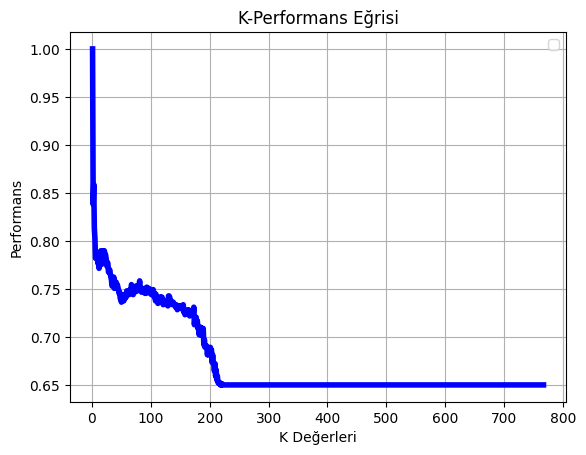

In [40]:
# Grafik üzerinde gösterim:
plt.plot(range(1,len(x)+1), skorListesi, color = 'blue', linewidth=4)
plt.xlabel('K Değerleri')
plt.ylabel('Performans')
plt.title('K-Performans Eğrisi')
plt.legend()
plt.grid()